# Ciencia de Datos, 2022

## Alan Reyes-Figueroa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import FastICA, FactorAnalysis, NMF, LatentDirichletAllocation
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.manifold import locally_linear_embedding
from sklearn import datasets

from sklearn.decomposition import PCA, KernelPCA

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

## Generate Half-moon

In [2]:
X, color = datasets.make_moons(n_samples=60, random_state=2021)

In [3]:
print(X.shape, color.shape)

(60, 2) (60,)


### PCA

In [4]:
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(X)

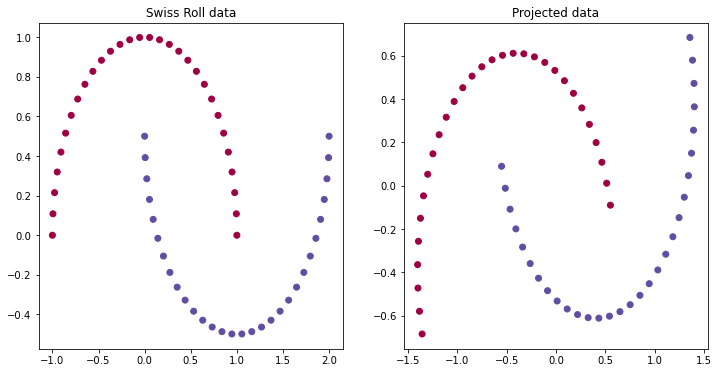

In [5]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(pca[:, 0], pca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
#plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### Kernel PCA

In [6]:
kpcamodel = KernelPCA(n_components=2, kernel='rbf', gamma=500., max_iter=500, random_state=19)
kpca = kpcamodel.fit_transform(X)

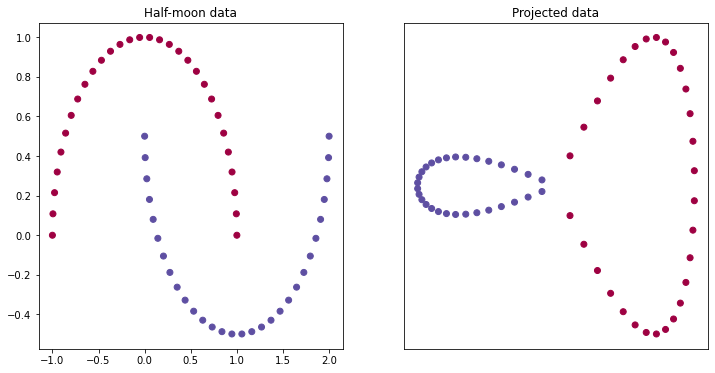

In [7]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Half-moon data")
ax = fig.add_subplot(122)
ax.scatter(kpca[:, 0], kpca[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

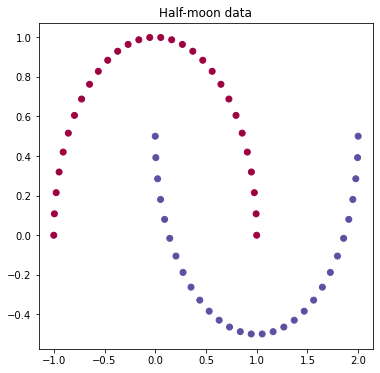

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Half-moon data")
plt.show()

In [9]:
#fig.savefig('half-moon.pdf', bbox_inches='tight')

## Manifold Learning con Swiss Roll

In [9]:
X, color = datasets.make_swiss_roll(n_samples=1500, random_state=2021)

In [10]:
print(X.shape, color.shape)

(1500, 3) (1500,)


In [11]:
print("Computing LLE embedding")
X_r, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 7.92572e-08


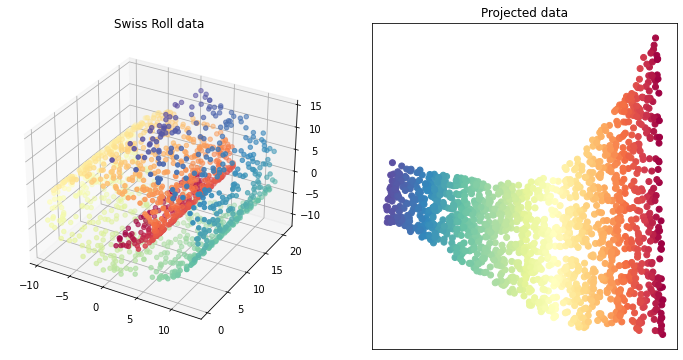

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### LLE

In [13]:
LLE = LocallyLinearEmbedding(n_neighbors=12, n_components=2, eigen_solver='auto')
lle = LLE.fit_transform(X)

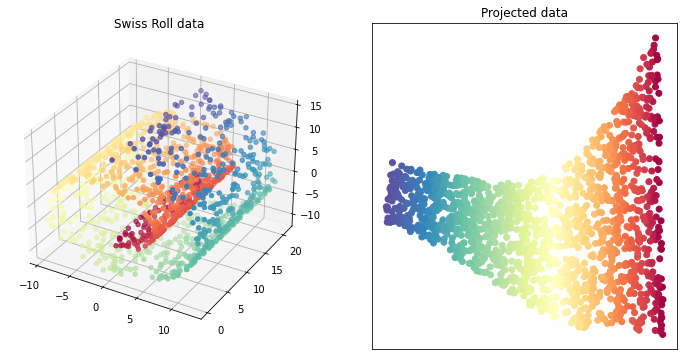

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(lle[:, 0], lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### ISOMap

In [15]:
ISO = Isomap(n_neighbors=12, n_components=2, eigen_solver='auto')
iso = ISO.fit_transform(X)

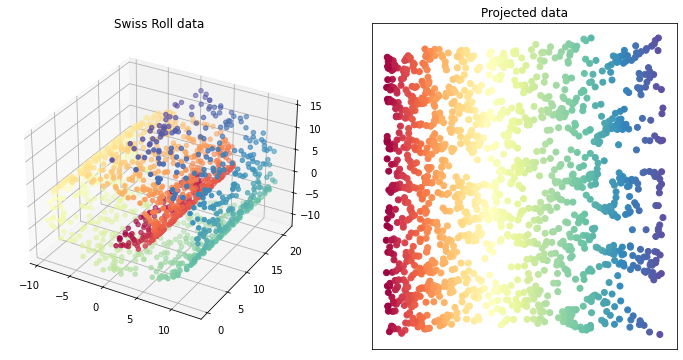

In [16]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(iso[:, 0], iso[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### t-SNE

In [21]:
# Probar con preplexity = 0.1, 10, 100, 1000
tSNE = TSNE(n_components=2, perplexity=10, init='pca', random_state=0)
tsne = tSNE.fit_transform(X)

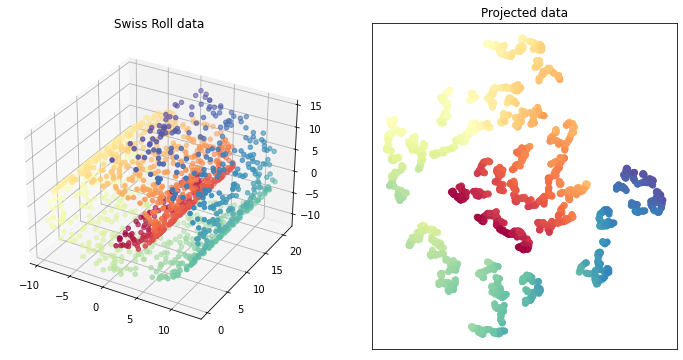

In [22]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(tsne[:, 0], tsne[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### SE

In [23]:
SE = SpectralEmbedding(n_neighbors=12, n_components=2, eigen_solver='arpack')
spe = SE.fit_transform(X)

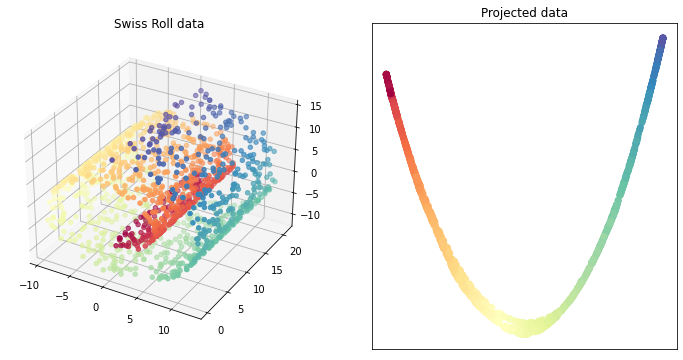

In [24]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(spe[:, 0], spe[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### MDS

In [25]:
MDS = MDS(n_components=2, max_iter=100, n_init=1)
mds = MDS.fit_transform(X)

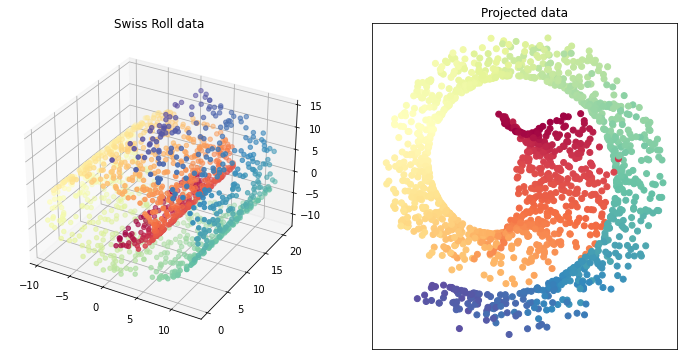

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(mds[:, 0], mds[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### Modified LLE

In [44]:
LLE = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='modified', eigen_solver='auto')
lle = LLE.fit_transform(X)

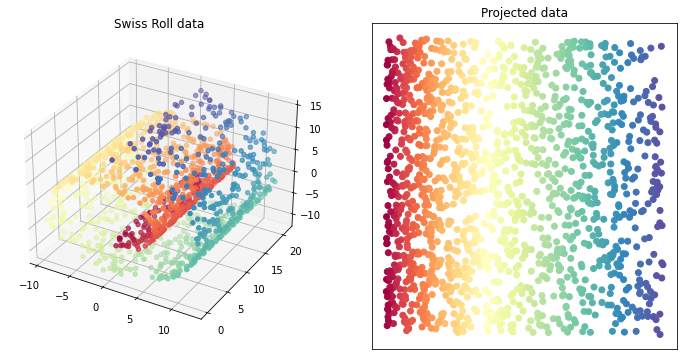

In [45]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(lle[:, 0], lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### Hessian LLE

In [46]:
LLE = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='hessian', eigen_solver='auto')
lle = LLE.fit_transform(X)

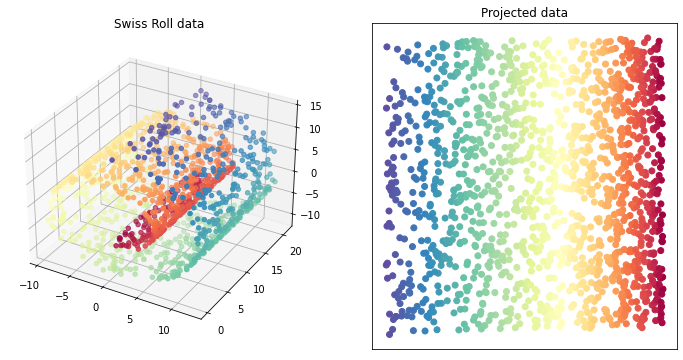

In [47]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(lle[:, 0], lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

### LTSA LLE

In [48]:
LLE = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='ltsa', eigen_solver='auto')
lle = LLE.fit_transform(X)

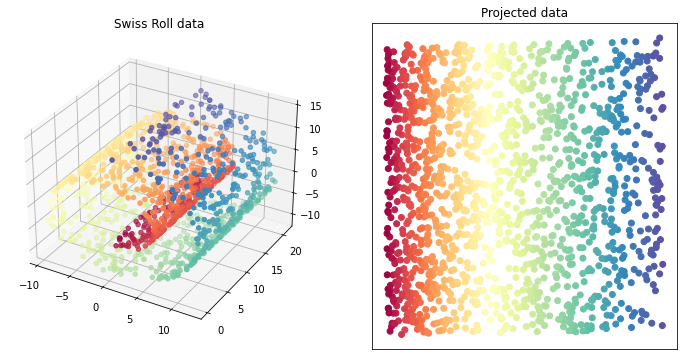

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll data")
ax = fig.add_subplot(122)
ax.scatter(lle[:, 0], lle[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()